<a href="https://colab.research.google.com/github/Jayjake1/NYC_taxi_trip_predication/blob/main/one_Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Almabetter/Copy of Copy of NYC Taxi Data.csv"
df = pd.read_csv(path,index_col = 'id')  # importing data

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.tail()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
df.isnull().sum()

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [ ]:
df.shape

(1458644, 10)

# EDA and Data Transformation

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime) # converting object into datetime format
df.dropoff_datetime = df.dropoff_datetime.apply(pd.to_datetime) # do same as above but takes more time

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   dropoff_datetime    1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 122.4+ MB


In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000


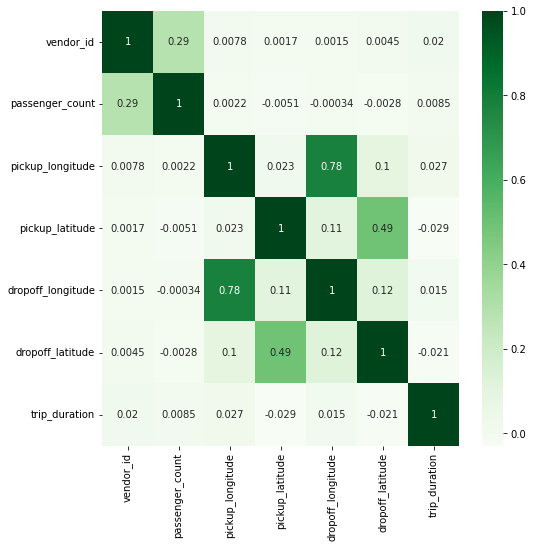

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

## Lets work on converting dataset into useful format

In [ ]:
import datetime
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_minute'] = df['pickup_datetime'].dt.minute
df['pickup_second'] = df['pickup_datetime'].dt.second
df['pickup_dayname'] = df['pickup_datetime'].dt.day_name()

NameError: ignored

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayname
id,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17,24,55,Monday
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0,43,35,Sunday
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,11,35,24,Tuesday
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,19,32,31,Wednesday
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,13,30,55,Saturday


In [ ]:
# finding distance using latitude and longitude 
def haversine_dist(sub_data):
  dlat=np.radians(sub_data['dropoff_latitude']- sub_data['pickup_latitude'])
  dlon=np.radians(sub_data['dropoff_longitude'] - sub_data['pickup_longitude'])
  r=6371 #in km
  h=np.sin(dlat/2)**2+np.cos(np.radians(sub_data['dropoff_latitude']))*np.cos(np.radians(sub_data['pickup_latitude']))*(np.sin(dlon/2))**2
  d=2*r*np.arcsin(np.sqrt(h))
  return d

In [ ]:
df['distance']=df.apply(haversine_dist,axis=1)

In [ ]:
# converting seconds to hrs
def to_hrs(colu):
  out = colu/3600
  return out

In [ ]:
df['trip_duration']=df.trip_duration.apply(to_hrs)

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayname,distance
id,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,2016,3,14,17,24,55,Monday,1.498521
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,2016,6,12,0,43,35,Sunday,1.805507
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,2016,1,19,11,35,24,Tuesday,6.385098
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,2016,4,6,19,32,31,Wednesday,1.485498
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,2016,3,26,13,30,55,Saturday,1.188588


In [ ]:
def velocity(df):
    return (df['distance']/(df['trip_duration']))

In [ ]:
df['Velocity']  = df.apply(velocity, axis = 1)

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayname,distance,Velocity
id,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,2016,3,14,17,24,55,Monday,1.498521,11.856428
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,2016,6,12,0,43,35,Sunday,1.805507,9.803659
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,2016,1,19,11,35,24,Tuesday,6.385098,10.822201
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,2016,4,6,19,32,31,Wednesday,1.485498,12.465721
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,2016,3,26,13,30,55,Saturday,1.188588,9.836594


In [ ]:
df.shape

(1458644, 19)

In [ ]:
# new_data = main_df[['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']]

In [ ]:
dist_col=['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


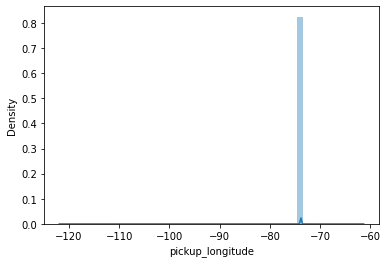

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


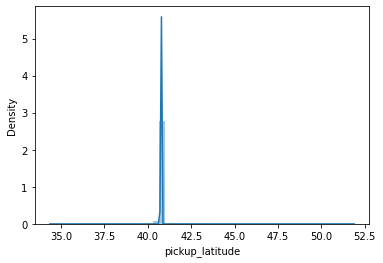

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


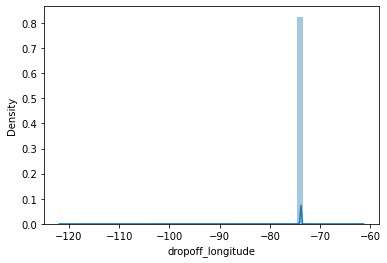

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


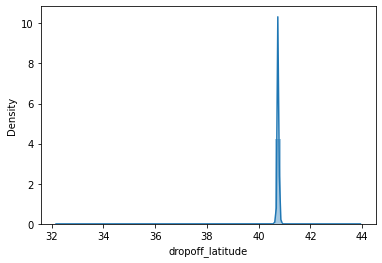

In [ ]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

In [ ]:
#Adding bounds to coordinates from the dataset to avoid Outliers affecting the plots
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude > 40.6) & (df.dropoff_latitude < 40.9)]
df= df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


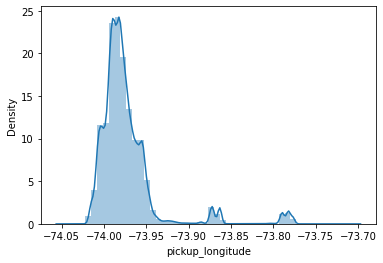

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


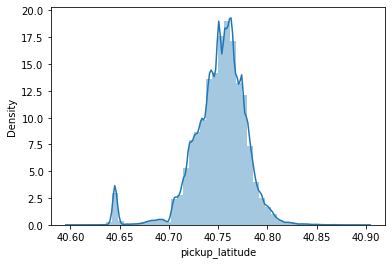

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


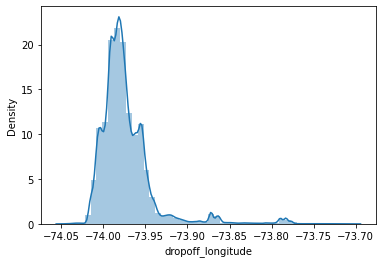

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


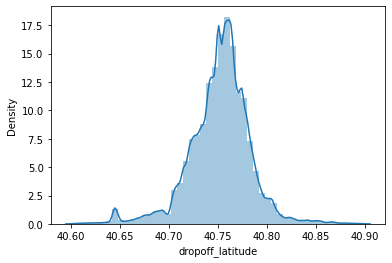

In [ ]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

In [ ]:
#i am removing more rows on the basis of this data distribution 
df= df.loc[(df.pickup_longitude > -74.02) & (df.pickup_longitude < -73.94)]
df = df.loc[(df.pickup_latitude > 40.7) & (df.pickup_latitude <40.81 )]
df = df.loc[(df.dropoff_longitude > -74.02) & (df.dropoff_longitude < -73.94)]
df = df.loc[(df.dropoff_latitude > 40.7) & (df.dropoff_latitude < 40.81)]


In [ ]:
df.shape

(1217934, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


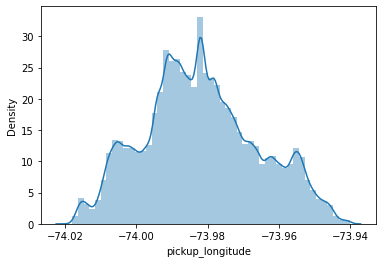

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


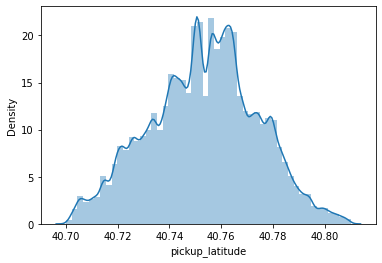

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


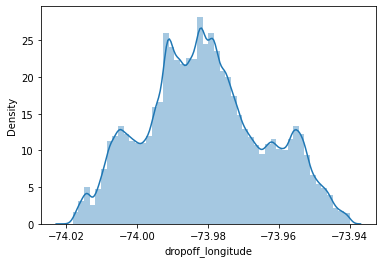

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


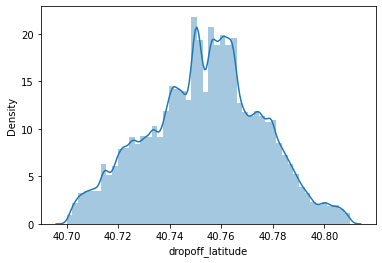

In [ ]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

## Univariate Analysis

In [ ]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

[Text(0.5, 1.0, 'Prominent Vendor offering services')]

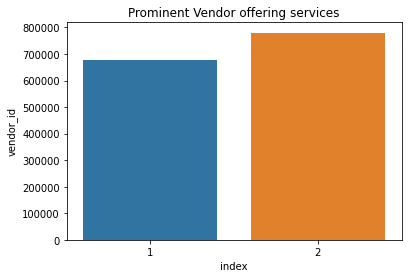

In [ ]:
import seaborn as sns
vend=df.vendor_id.value_counts().reset_index()
sns.barplot(x = vend['index'], y = vend.vendor_id,data = vend).set( title = 'Prominent Vendor offering services')

### passenger count

In [ ]:
passengers = df.passenger_count.value_counts().reset_index()
passengers

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404
6,0,60
7,7,3
8,9,1
9,8,1


- A maximum of 4 passengers may be carried in most cabs, 

- although larger minivans may accommodate 5 passengers, and 1 child under seven can sit on an adult’s lap in the back seat if the maximum has been reached, this means we can have 6 passengers

In [ ]:
df = df.drop(df[df['passenger_count'] > 6].index) 

In [ ]:
passengers=df.passenger_count.value_counts().reset_index()
passengers

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404
6,0,60


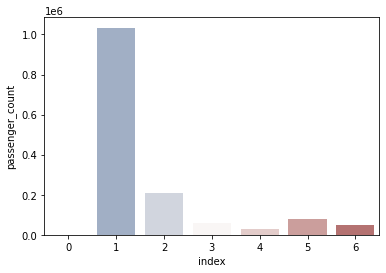

In [ ]:
sns.barplot(x=passengers['index'],y = passengers['passenger_count'],palette='vlag')

In [ ]:
df=df.drop(df[df['passenger_count']==0].index)

In [ ]:
passengers=df.passenger_count.value_counts().reset_index()
passengers

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404


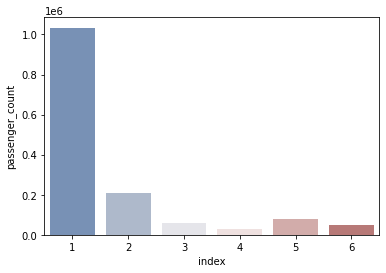

In [ ]:
sns.barplot(x=passengers['index'],y = passengers['passenger_count'],palette='vlag')

### store 

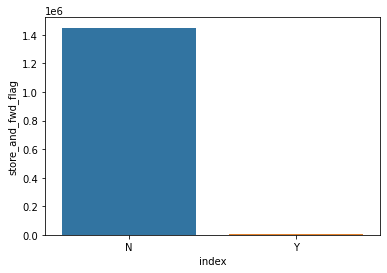

In [ ]:
store=df['store_and_fwd_flag'].value_counts().reset_index()
sns.barplot(x=store['index'],y=store['store_and_fwd_flag'])

### trip duration

In [ ]:
df['trip_duration'].describe()

count    1.458579e+06
mean     2.665177e-01
std      1.454742e+00
min      2.777778e-04
25%      1.102778e-01
50%      1.838889e-01
75%      2.986111e-01
max      9.795228e+02
Name: trip_duration, dtype: float64

In [ ]:
df.trip_duration.value_counts()

0.102222     1624
0.113333     1584
0.096667     1582
0.101944     1581
0.099444     1577
             ... 
1.390278        1
17.053333       1
23.364167       1
22.935000       1
23.396111       1
Name: trip_duration, Length: 7416, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


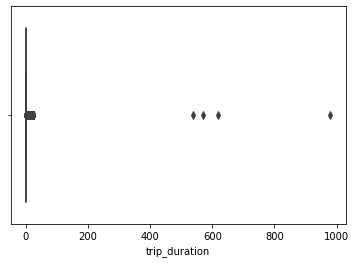

In [ ]:
sns.boxplot(df.trip_duration)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


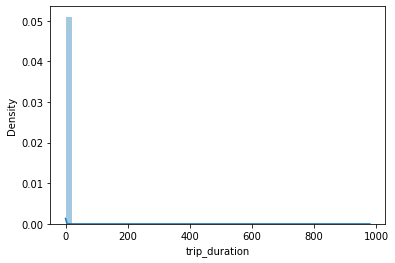

In [ ]:
sns.distplot(df['trip_duration'])

In [ ]:
df=df.drop(df[df['trip_duration']>=24].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


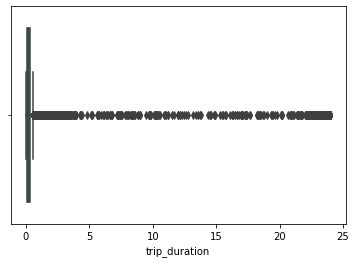

In [ ]:
sns.boxplot(df.trip_duration)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


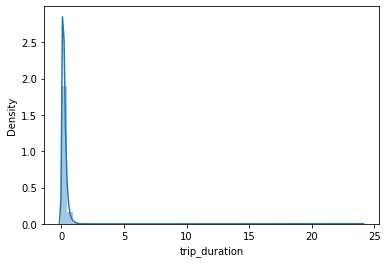

In [ ]:
sns.distplot(df.trip_duration)

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayname,distance,Velocity
id,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,2016,3,14,17,24,55,Monday,1.498521,11.856428
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,2016,6,12,0,43,35,Sunday,1.805507,9.803659
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,2016,1,19,11,35,24,Tuesday,6.385098,10.822201
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,2016,4,6,19,32,31,Wednesday,1.485498,12.465721
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,2016,3,26,13,30,55,Saturday,1.188588,9.836594


In [ ]:
months=df.pickup_month.value_counts().sort_index().reset_index()
months['index'] = months['index'].map({1:'Jan',
                             2:'Feb',
                             3:'Mar',
                             4:'Apr',
                             5:'May',
                             6:'Jun'},
                             na_action=None)
months

,index,pickup_month
0,Jan,229690
1,Feb,238286
2,Mar,256179
3,Apr,251636
4,May,248474
5,Jun,234310


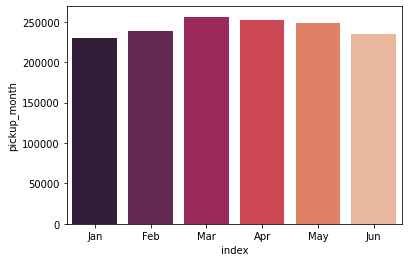

In [ ]:
sns.barplot(x=months['index'],y=months['pickup_month'],palette='rocket') #deep, vlag, rocket

### Weekday

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


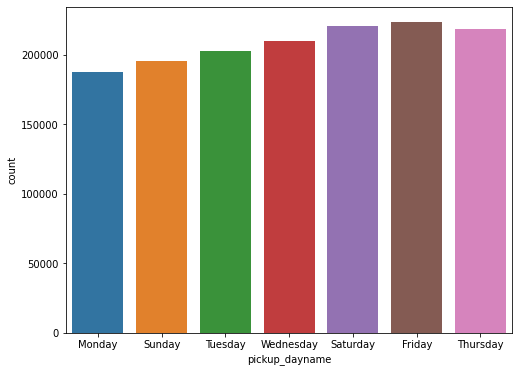

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['pickup_dayname'])

## Month days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


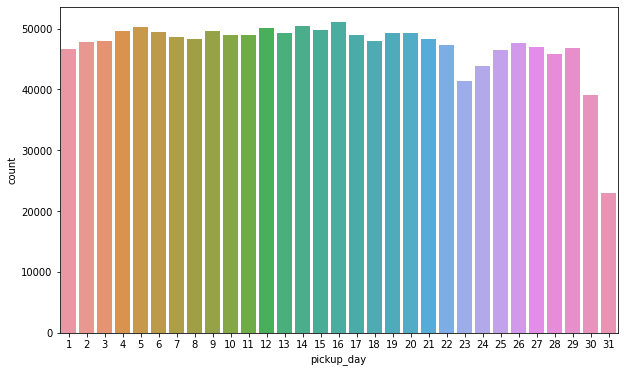

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df.pickup_day)

### Trips according to hours

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


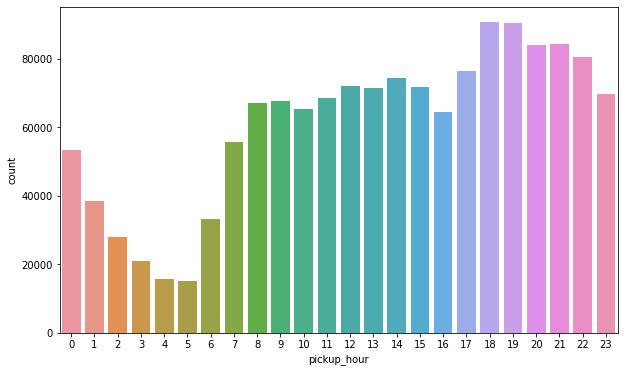

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df.pickup_hour)

- There are more booking in evening

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


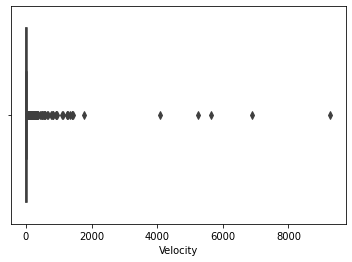

In [ ]:
sns.boxplot(df.Velocity)

In [ ]:
df[df['Velocity']>100]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayname,distance,Velocity
id,,,,,,,,,,,,,,,,,,,
id0729156,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,0.000556,2016,6,23,13,36,48,Thursday,0.703065,1265.516683
id0995203,2,2016-05-15 18:31:33,2016-05-15 18:31:59,5,-73.791206,40.666481,-73.800903,40.669819,N,0.007222,2016,5,15,18,31,33,Sunday,0.898129,124.356287
id3468323,1,2016-06-27 18:37:21,2016-06-27 18:43:16,1,-73.881195,40.882942,-73.965141,40.762486,N,0.098611,2016,6,27,18,37,21,Monday,15.142631,153.559078
id1623366,2,2016-05-27 23:00:28,2016-05-27 23:00:35,1,-73.975571,40.762367,-73.977898,40.763184,N,0.001944,2016,5,27,23,0,28,Friday,0.215981,111.076074
id1957624,2,2016-03-27 16:28:42,2016-03-27 16:32:25,1,-74.069908,40.739052,-74.157913,40.712528,N,0.061944,2016,3,27,16,28,42,Sunday,7.980951,128.840458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2905190,2,2016-03-05 00:17:29,2016-03-05 00:17:32,1,-74.003487,40.732609,-74.004189,40.731274,N,0.000833,2016,3,5,0,17,29,Saturday,0.159808,191.769583
id1367936,2,2016-06-05 00:38:28,2016-06-05 00:38:31,1,-73.978363,40.729126,-73.978760,40.728424,N,0.000833,2016,6,5,0,38,28,Sunday,0.084906,101.887621
id1520147,2,2016-02-15 08:42:29,2016-02-15 08:42:35,2,-73.953590,40.806183,-73.955643,40.806698,N,0.001667,2016,2,15,8,42,29,Monday,0.181979,109.187161


In [ ]:
df.distance.value_counts()

0.000000    5887
0.000424     137
0.000848      62
0.000424      50
0.001273      42
            ... 
1.259793       1
1.426920       1
2.159095       1
2.722239       1
2.425337       1
Name: distance, Length: 1452220, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


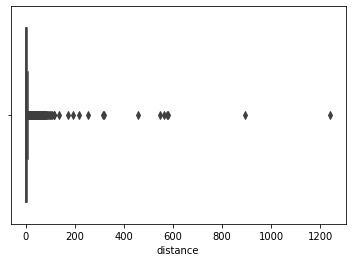

In [ ]:
sns.boxplot(df.distance)

In [ ]:
df[df['distance']>100]   # Newyork city area - 778.2 km2

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayname,distance,Velocity
id,,,,,,,,,,,,,,,,,,,
id1092161,1,2016-04-15 22:35:08,2016-04-16 00:34:21,1,-73.781792,40.644718,-72.711395,41.311520,N,1.986944,2016,4,15,22,35,8,Friday,116.496424,58.630942
id1311087,1,2016-02-29 12:16:29,2016-02-29 18:47:09,3,-75.455917,39.803932,-73.796021,40.707726,N,6.511111,2016,2,29,12,16,29,Monday,173.029358,26.574475
id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,0.220000,2016,5,7,18,58,53,Saturday,1240.908677,5640.493985
id0978162,1,2016-02-24 16:20:59,2016-02-24 16:35:34,4,-75.354332,34.712234,-73.834923,32.181141,N,0.243056,2016,2,24,16,20,59,Wednesday,314.764203,1295.029865
id2778014,2,2016-01-17 16:43:09,2016-01-17 16:50:16,1,-73.997086,40.728924,-72.671150,40.614220,N,0.118611,2016,1,17,16,43,9,Sunday,112.548872,948.889784
id0116374,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,0.078333,2016,4,2,20,33,19,Saturday,320.125775,4086.712020
id0982904,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.870682,40.773598,-79.817978,38.963852,N,0.698611,2016,4,28,13,32,14,Thursday,545.853499,781.340992
id2066082,1,2016-01-25 23:53:17,2016-01-26 01:25:46,1,-73.877716,40.772167,-72.905891,41.319832,N,1.541389,2016,1,25,23,53,17,Monday,101.736296,66.003003
id1723416,1,2016-03-20 21:07:56,2016-03-20 21:12:35,1,-78.547401,40.817131,-79.786133,40.917637,N,0.077500,2016,3,20,21,7,56,Sunday,104.759971,1351.741558


In [ ]:
df['distance'].describe()

count    1.458575e+06
mean     3.440939e+00
std      4.296509e+00
min      0.000000e+00
25%      1.231912e+00
50%      2.093784e+00
75%      3.875402e+00
max      1.240909e+03
Name: distance, dtype: float64

# Bivariate Analysis

Dependent variable with other

In [ ]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayname,distance,Velocity
id,,,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,0.126389,2016,3,14,17,24,55,Monday,1.498521,11.856428
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,0.184167,2016,6,12,0,43,35,Sunday,1.805507,9.803659
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,0.590000,2016,1,19,11,35,24,Tuesday,6.385098,10.822201
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,0.119167,2016,4,6,19,32,31,Wednesday,1.485498,12.465721
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,0.120833,2016,3,26,13,30,55,Saturday,1.188588,9.836594


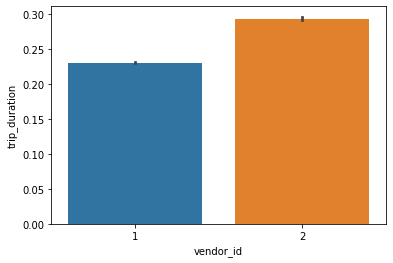

In [ ]:
sns.barplot(x=df.vendor_id,y=df.trip_duration)

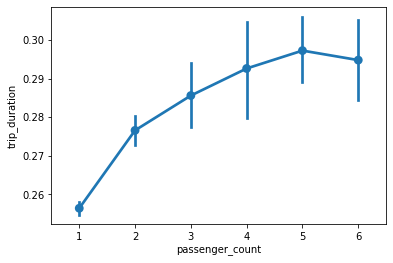

In [ ]:
sns.pointplot(x='passenger_count',y='trip_duration',data=df)

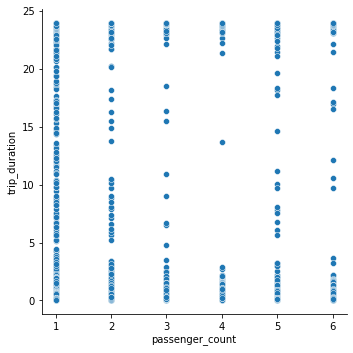

In [ ]:
sns.relplot(x='passenger_count',y='trip_duration',data=df,kind='scatter')

<Figure size 720x432 with 0 Axes>

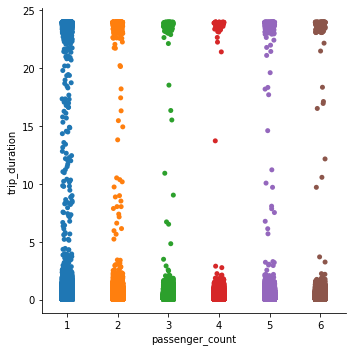

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(x='passenger_count',y='trip_duration',data=df,kind='strip')

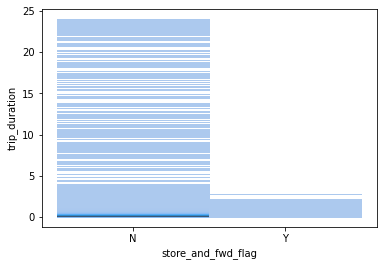

In [ ]:
sns.histplot(x='store_and_fwd_flag',y='trip_duration',data=df)

<Figure size 720x432 with 0 Axes>

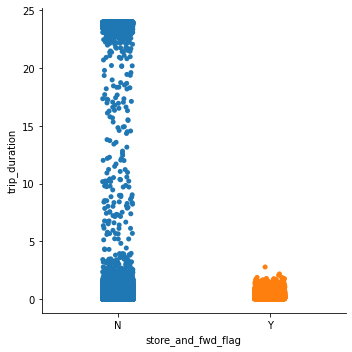

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(x='store_and_fwd_flag',y='trip_duration',data=df,kind='strip')

- Trip duration is longer when flag is not stored

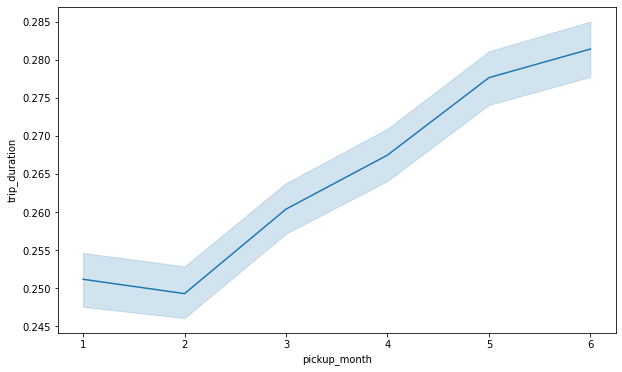

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_month',y='trip_duration',data=df)

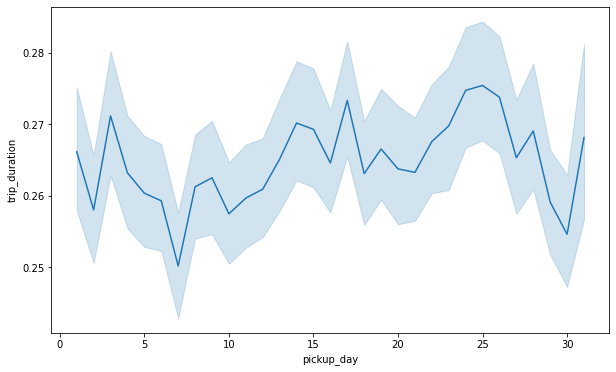

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_day',y='trip_duration',data=df)

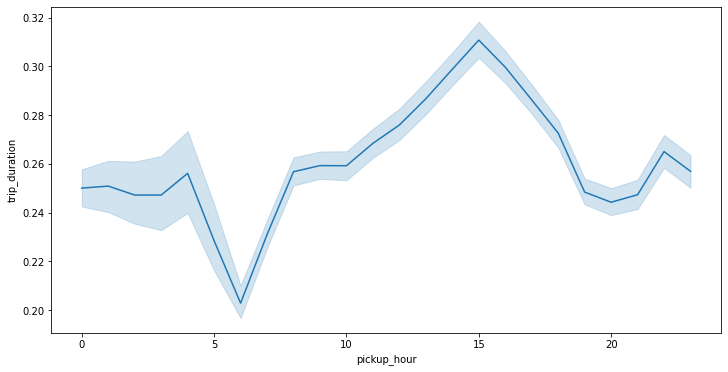

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)

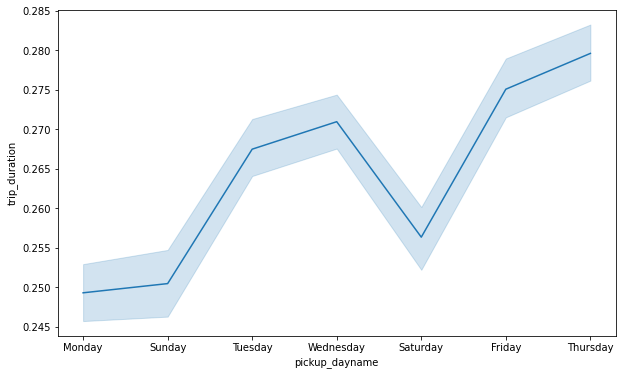

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_dayname',y='trip_duration',data=df)

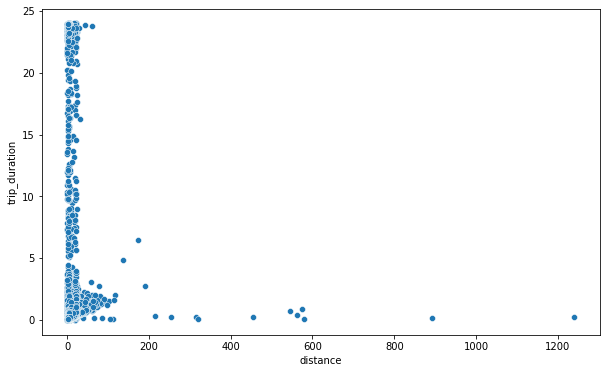

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance',y='trip_duration',data=df)

<Figure size 720x432 with 0 Axes>

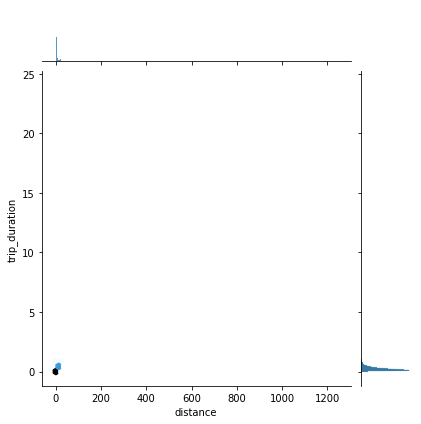

In [ ]:
plt.figure(figsize=(10,6))
sns.jointplot(x='distance',y='trip_duration',kind = 'hex',data=df)

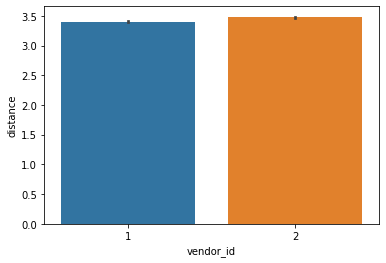

In [ ]:
sns.barplot(x=df.vendor_id,y=df.distance)

<Figure size 720x432 with 0 Axes>

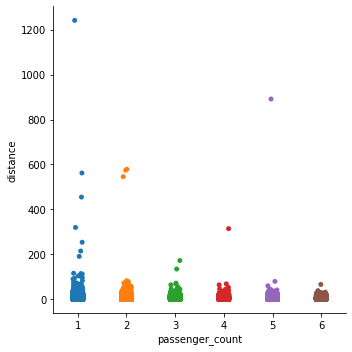

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(x='passenger_count',y='distance',data=df,kind='strip')

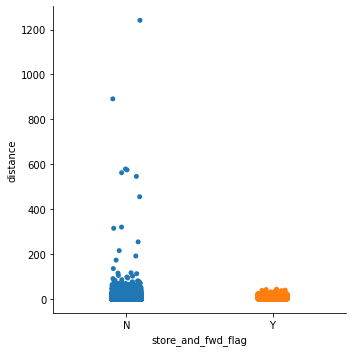

In [ ]:
sns.catplot(x='store_and_fwd_flag',y='distance',data=df,kind='strip')

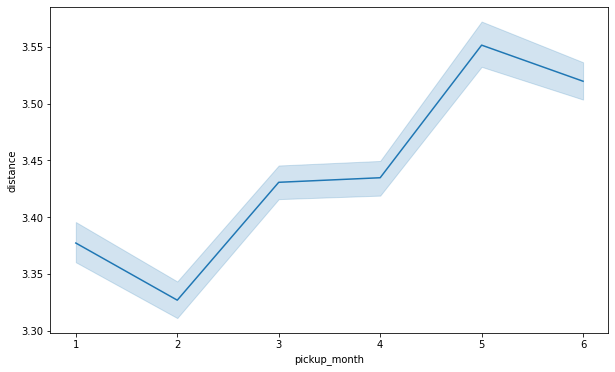

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_month',y='distance',data=df)

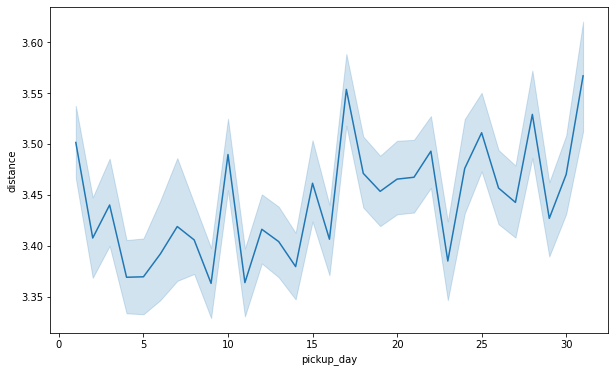

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_day',y='distance',data=df)

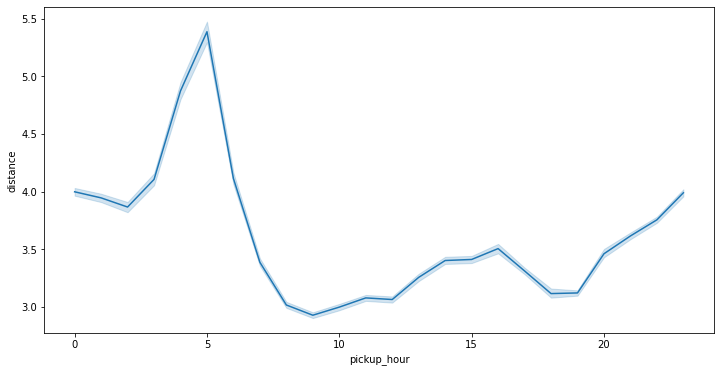

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='pickup_hour',y='distance',data=df)

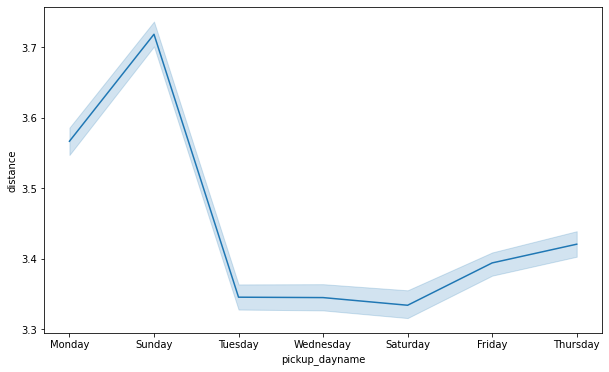

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_dayname',y='distance',data=df)

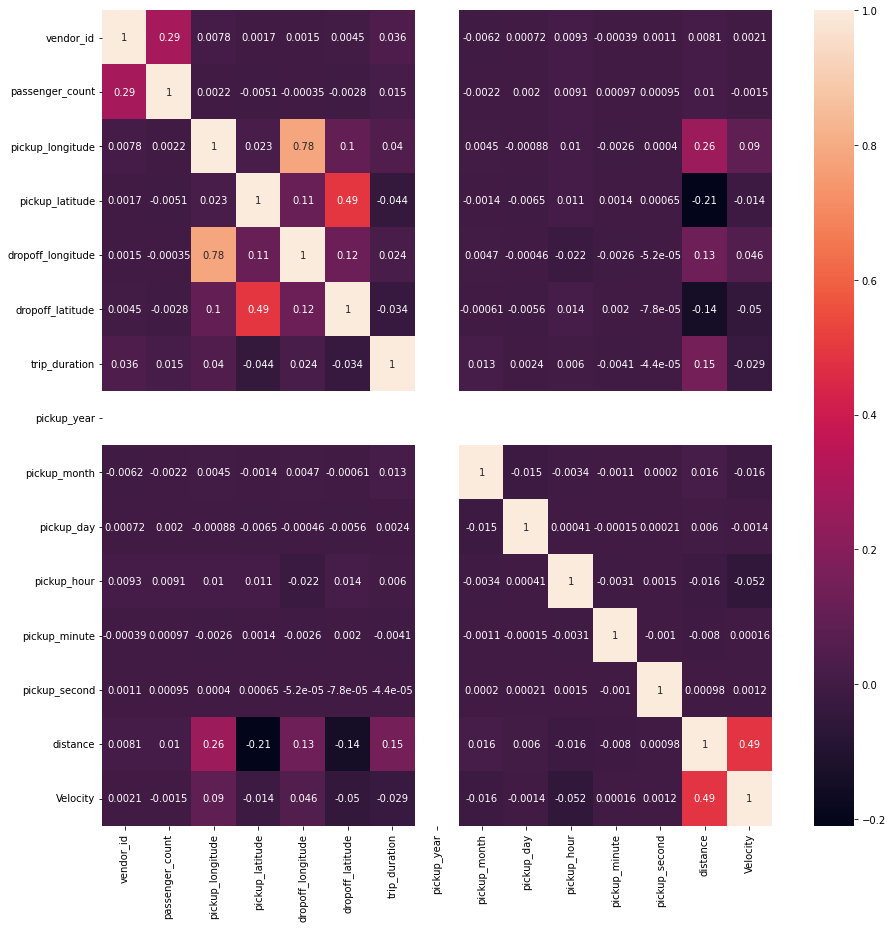

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

#yashesh


In [ ]:
max_dist=df['haversine_dist'].max()

In [ ]:
max_dist_trip_time=df[df['haversine_dist'] == max_dist].trip_duration.values[0]
max_dist_trip_time

1212

In [ ]:
#now i am again dealing with distance outliers
df[df['haversine_dist']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_dist,Velocity


**Above we can say distance ==0 which means which trip did not happend **

In [ ]:
sub_data3=df[df['haversine_dist']==0]

In [ ]:
#dropped above rows 
df.drop(sub_data3.index,inplace=True)


In [ ]:
df.shape

(1211361, 13)

In [ ]:
df['haversine_dist'].describe()

count    1.211361e+06
mean     2.280700e+00
std      1.592034e+00
min      4.241750e-04
25%      1.148300e+00
50%      1.831863e+00
75%      2.950230e+00
max      1.321932e+01
Name: haversine_dist, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


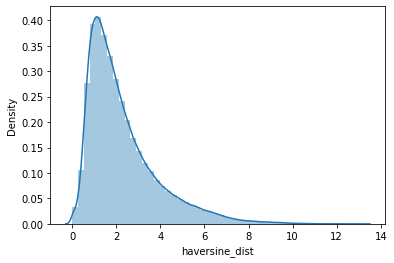

In [ ]:
ax = sns.distplot(df['haversine_dist'])
plt.show()

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df.haversine_dist)
plt.show()

In [ ]:
ax = sns.distplot(df['trip_duration'])
plt.show()



***Here few values are more than 86400 sec which is grater than 24hrs which are outliers****

In [ ]:
index1=df[df['trip_duration'] > 86400].index
df.drop(index1,inplace=True)


In [ ]:
ax = sns.distplot(df['trip_duration'])
plt.show()

In [ ]:
#checking the trip_duration which has taken more than 5 hrs it will be treated as outlier cause the maximum distance from all the data is 13km and also less than 15 sec trips is not possible 
sub_data2=df[(df['trip_duration']>1600) | (df['trip_duration'] < 120 ) ]


In [ ]:
#droping the rows which are not following this condition because they are creating problem as outliers
df.drop(sub_data2.index,inplace=True)

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_duration)
plt.show()

**Let's Check the data distribution of cordinates**

In [ ]:
dist_col=['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


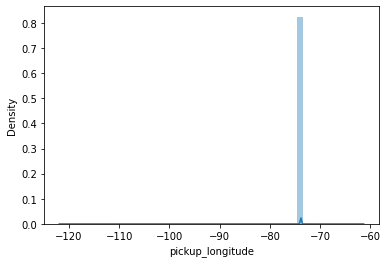

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


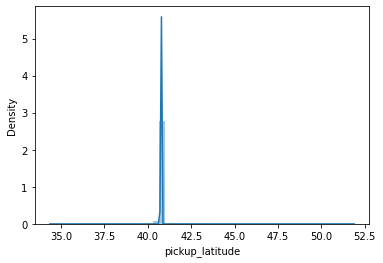

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


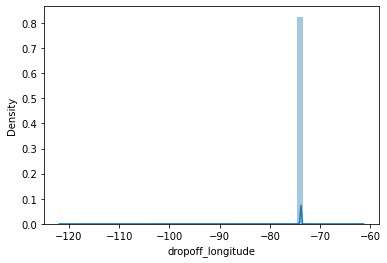

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


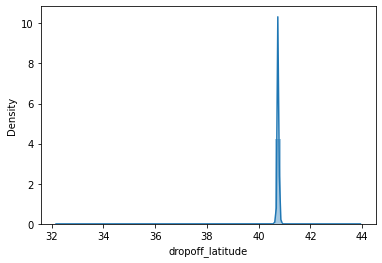

In [ ]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

In [ ]:
#Add bounds to coordinates from the dataset to avoid Outliers affecting the plots
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude > 40.6) & (df.dropoff_latitude < 40.9)]
df= df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


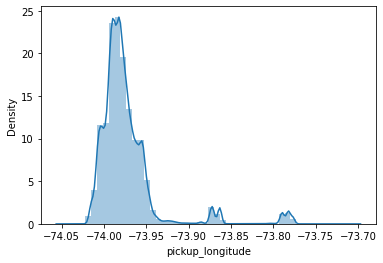

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


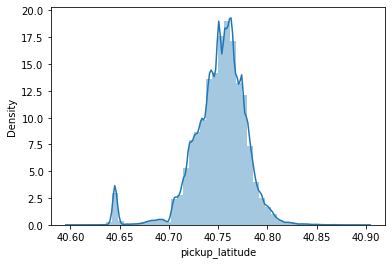

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


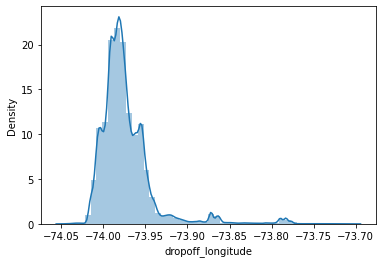

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


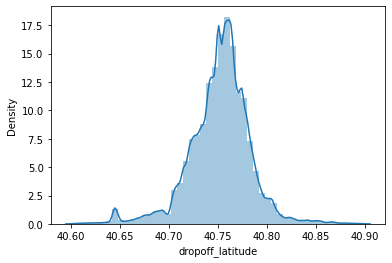

In [ ]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()

In [ ]:
#i am removing more rows on the basis of this data distribution 
df= df.loc[(df.pickup_longitude > -74.02) & (df.pickup_longitude < -73.94)]
df = df.loc[(df.pickup_latitude > 40.7) & (df.pickup_latitude <40.81 )]
df = df.loc[(df.dropoff_longitude > -74.02) & (df.dropoff_longitude < -73.94)]
df = df.loc[(df.dropoff_latitude > 40.7) & (df.dropoff_latitude < 40.81)]


In [ ]:
df.shape

(1217934, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


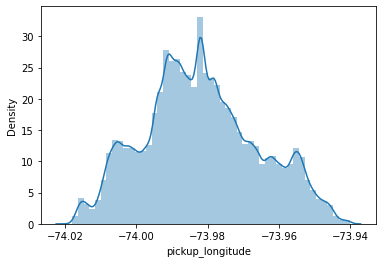

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


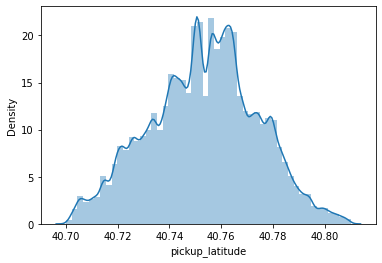

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


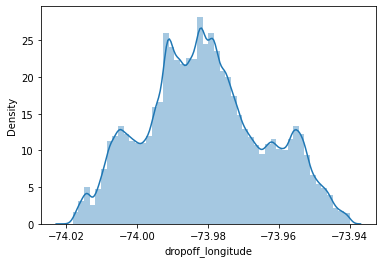

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


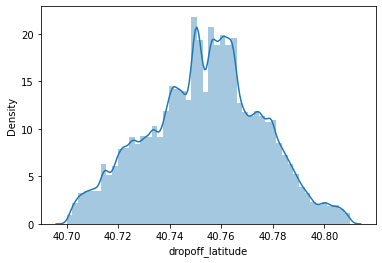

In [ ]:
for i in dist_col:
    ax = sns.distplot(df[i])
    plt.show()